In [1]:
%load_ext autoreload
%autoreload 2

from image_utils import preprocess_from_file, preprocess_from_url
from model import ImageModel
from PIL import Image
from io import BytesIO
import requests

In [3]:
# modelの読み込み
model = ImageModel('sample_model')

## ローカルの画像を使用して予測を行う場合

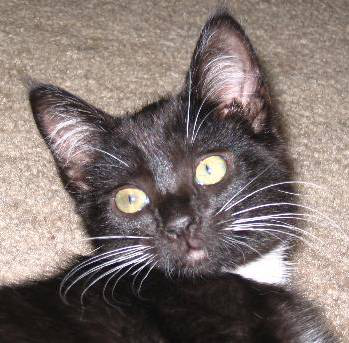

In [4]:
# labelを予測する画像の確認
Image.open('sample_image/cat/cat.102.jpg')

In [10]:
%%time
# 画像をmodelへの入力データに変換
image = preprocess_from_file('sample_image/cat/cat.102.jpg')
# 予測実行
model.predict(image)

CPU times: user 199 ms, sys: 28.6 ms, total: 227 ms
Wall time: 180 ms


'cat'

In [15]:
%%time
# 画像をmodelへの入力データに変換
image = preprocess_from_file('sample_image/dog/dog.102.jpg')
# 予測実行
model.predict(image)

CPU times: user 168 ms, sys: 17.2 ms, total: 185 ms
Wall time: 74.4 ms


'dog'

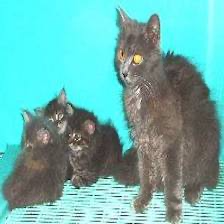

In [5]:
Image.open('sample_image/cat/cat.101.png')

In [109]:
%%time
# 画像をmodelへの入力データに変換
# PNG形式の画像ファイルでも予測可能
image = preprocess_from_file('sample_image/cat/cat.101.png')
# 予測実行
model.predict(image)

CPU times: user 221 ms, sys: 24.7 ms, total: 246 ms
Wall time: 101 ms


'cat'

## WEB上の画像を使用して予測を行う場合

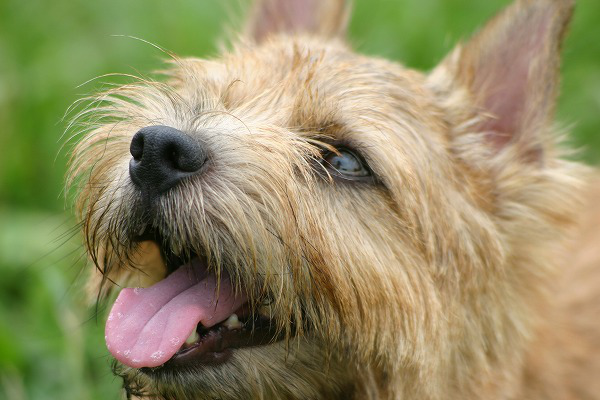

In [74]:
image = BytesIO(requests.get('https://pro-foto.jp/free/img/images_big/dog0149-041.jpg').content)
Image.open(image)

In [13]:
%%time
# 画像をmodelへの入力データに変換
image = preprocess_from_url('https://pro-foto.jp/free/img/images_big/dog0149-041.jpg')
model.predict(image)

CPU times: user 169 ms, sys: 19.2 ms, total: 188 ms
Wall time: 376 ms


'dog'